## Which service requests are most common for the city overall AND by NEIGHBORHOOD and how is this changing year over year by SUBJECT (department), REASON,QUEUE?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../../data/data_total2.csv')

df['open_dt'] = pd.to_datetime(df['open_dt'])
df['closed_dt'] = pd.to_datetime(df['closed_dt'])

df['year'] = df['open_dt'].dt.year

columns_with_few_missing = ['neighborhood', 'latitude', 'longitude', 'location_street_name', 'fire_district', 'pwd_district']
df.dropna(subset=columns_with_few_missing, inplace=True)

df.drop(['sla_target_dt', 'submitted_photo', 'closed_photo'], axis=1, inplace=True)

df.drop_duplicates(inplace=True)

df.reset_index(drop=True, inplace=True)

/var/folders/x_/8pz94hbn65n99wfln5fd_p840000gn/T/ipykernel_76125/956790631.py:5: DtypeWarning: Columns (14,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/data_total2.csv')


### Most common service requests for the city overall

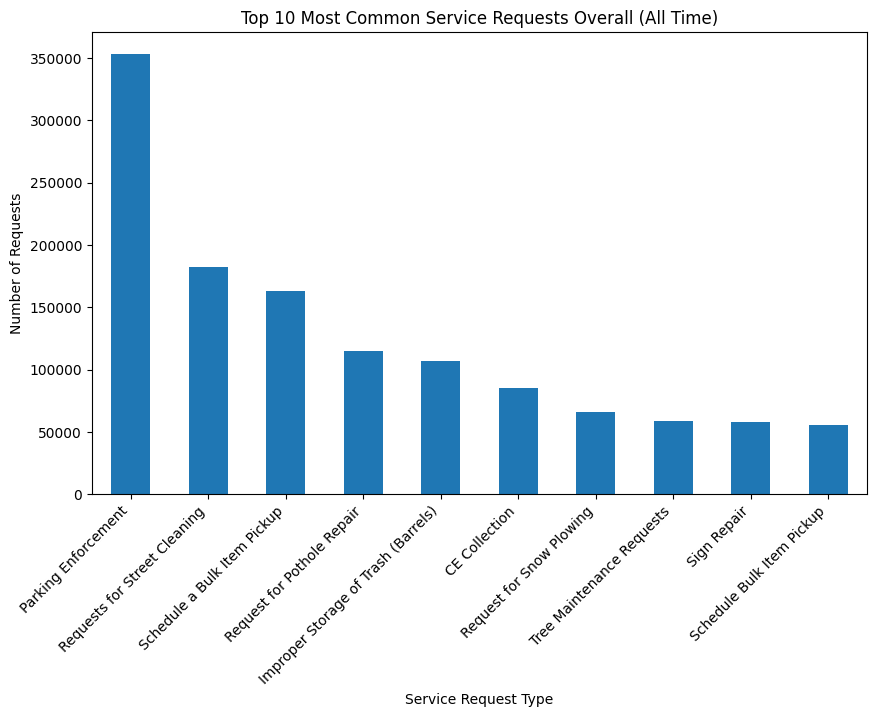

In [2]:
common_requests_overall = df['case_title'].value_counts().head(10)

plt.figure(figsize=(10, 6))
common_requests_overall.plot(kind='bar')
plt.title('Top 10 Most Common Service Requests Overall (All Time)')
plt.xlabel('Service Request Type')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', which='major', labelsize=10)
plt.show()


### Most common service requests by neighborhood

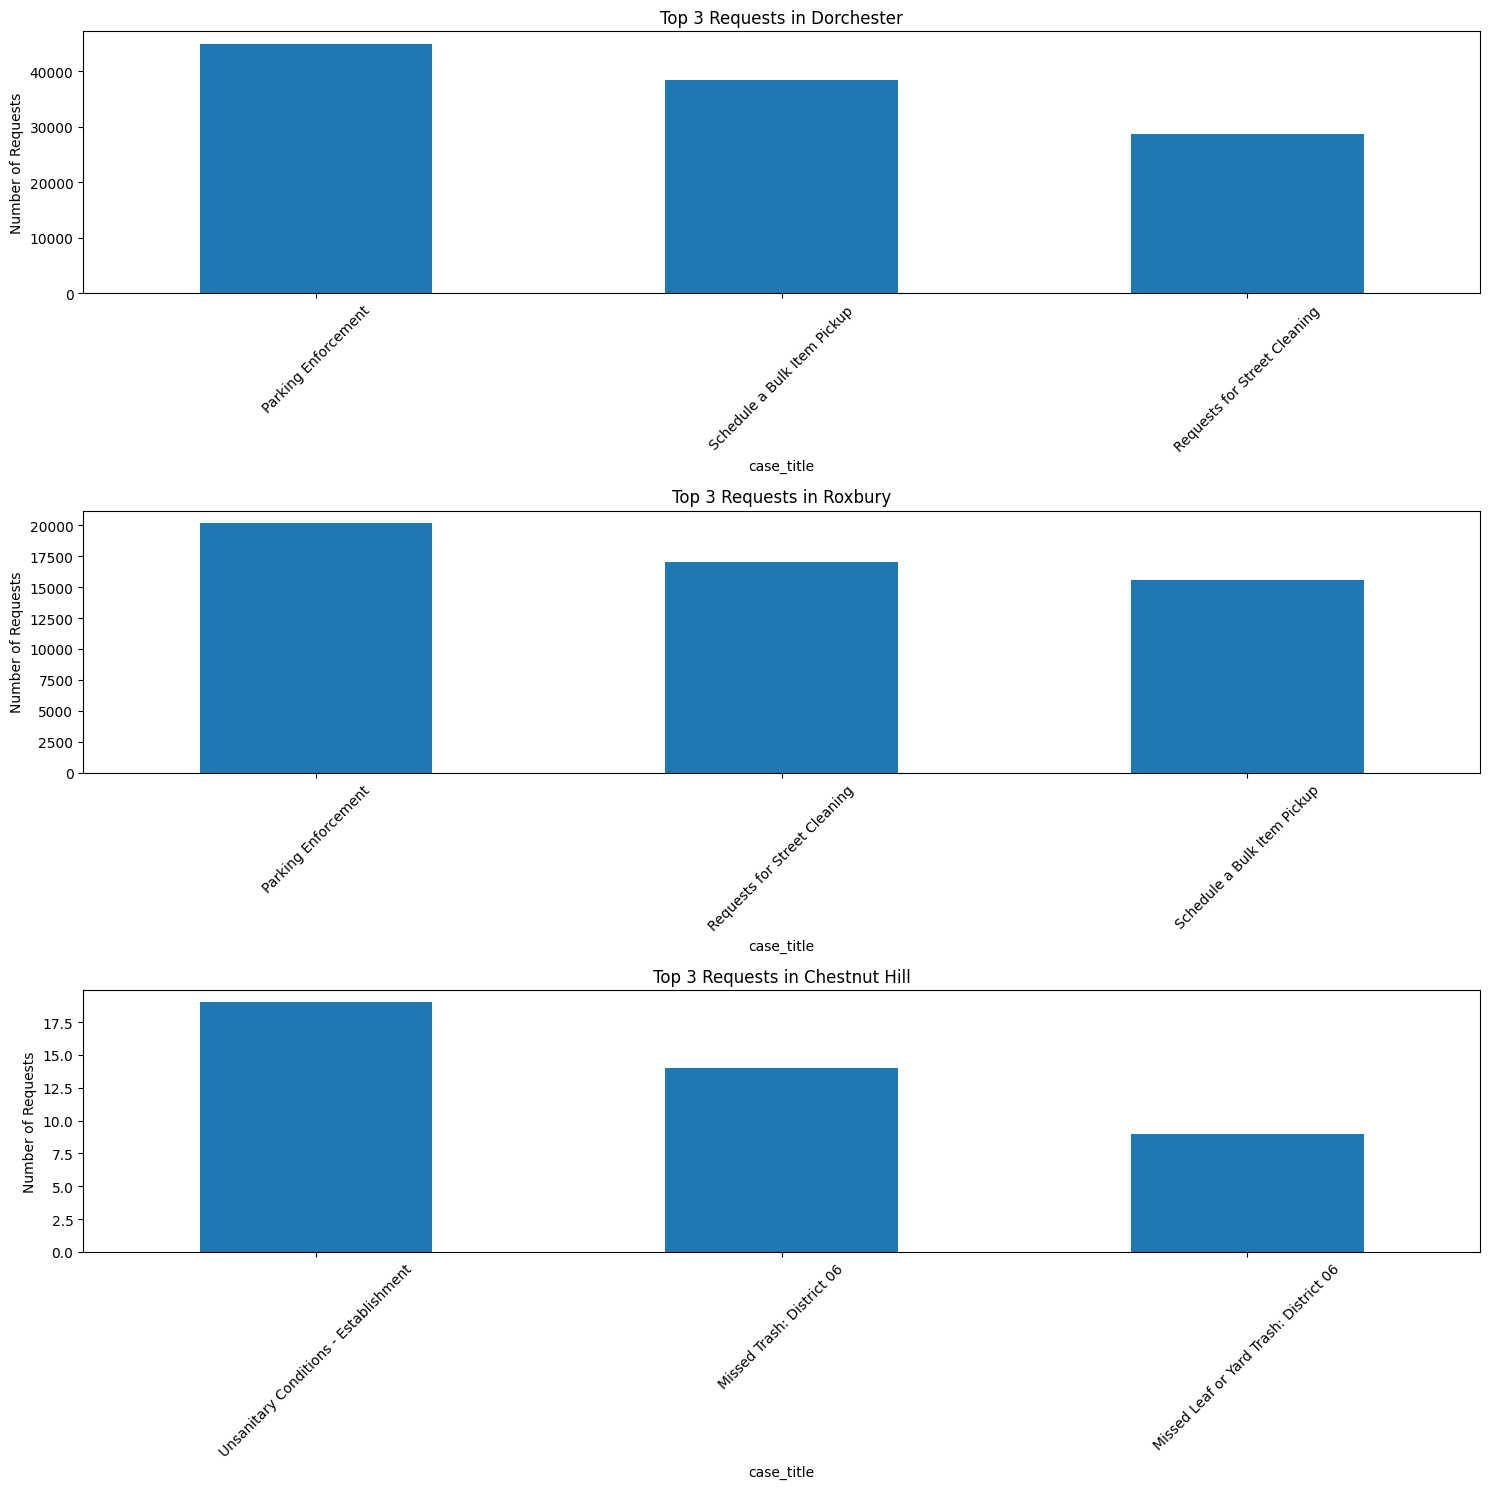

In [3]:
def plot_common_requests_by_neighborhood(df, neighborhoods, top_n=3):
    plt.figure(figsize=(15, len(neighborhoods) * 5))

    for i, neighborhood in enumerate(neighborhoods, 1):
        top_requests = df[df['neighborhood'] == neighborhood]['case_title'].value_counts().head(top_n)
        
        plt.subplot(len(neighborhoods), 1, i)
        top_requests.plot(kind='bar')
        plt.title(f'Top {top_n} Requests in {neighborhood}')
        plt.ylabel('Number of Requests')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

selected_neighborhoods = ['Dorchester', 'Roxbury', 'Chestnut Hill']
plot_common_requests_by_neighborhood(df, selected_neighborhoods)


### How is this changing year over year by SUBJECT (department), REASON,QUEUE?

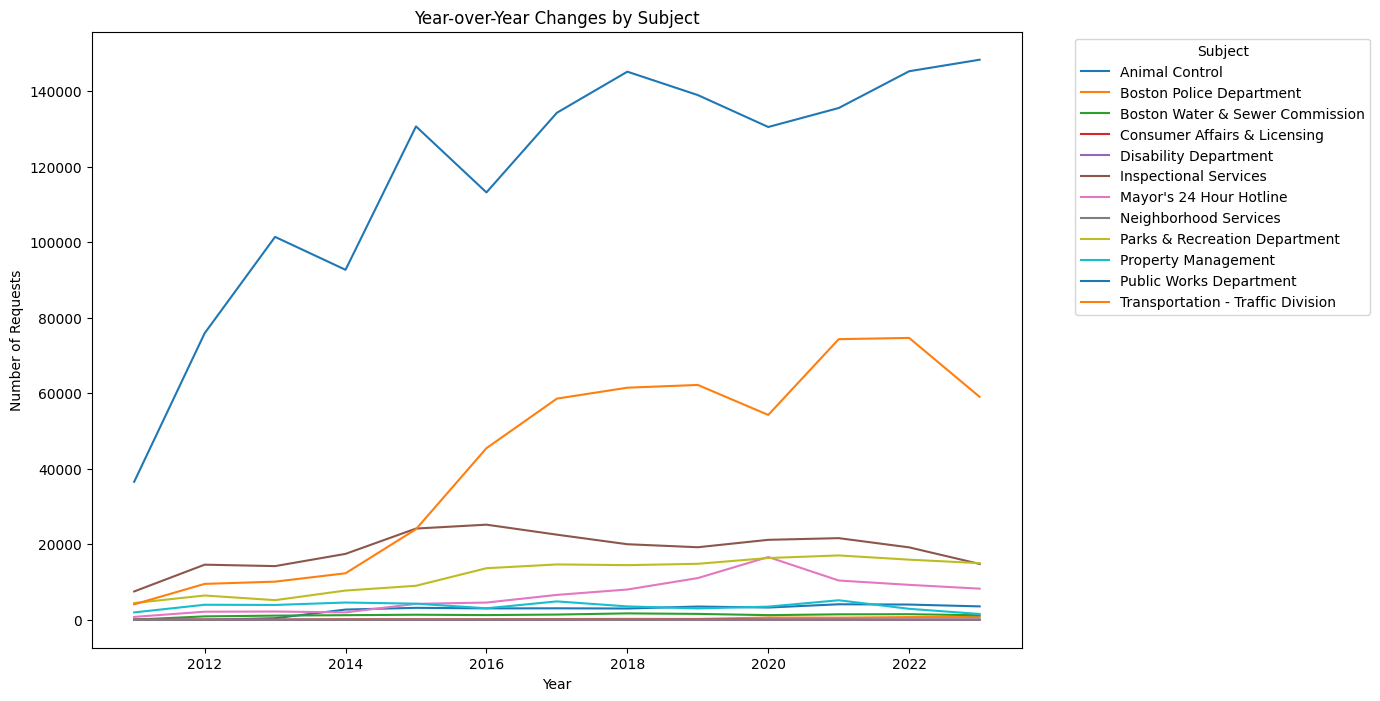

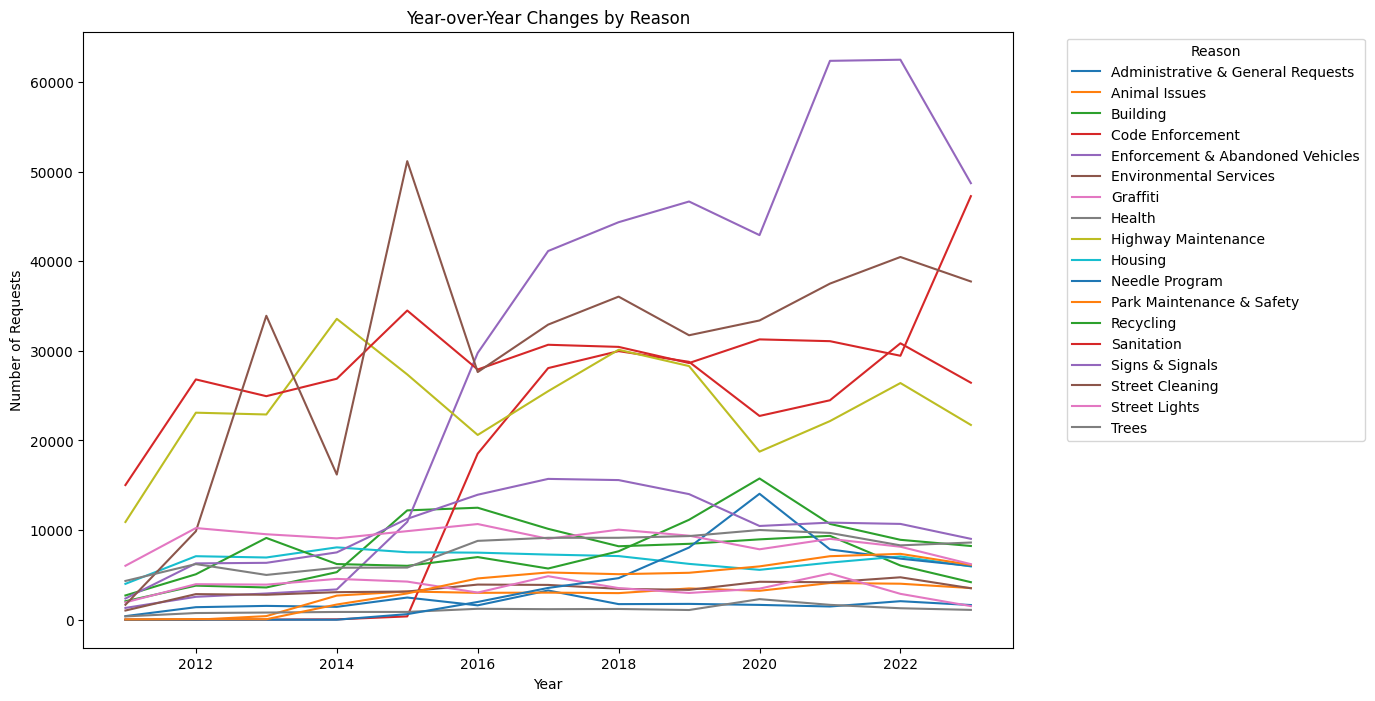

reason
Enforcement & Abandoned Vehicles    48710.0
Sanitation                          47262.0
Name: 2023, dtype: float64


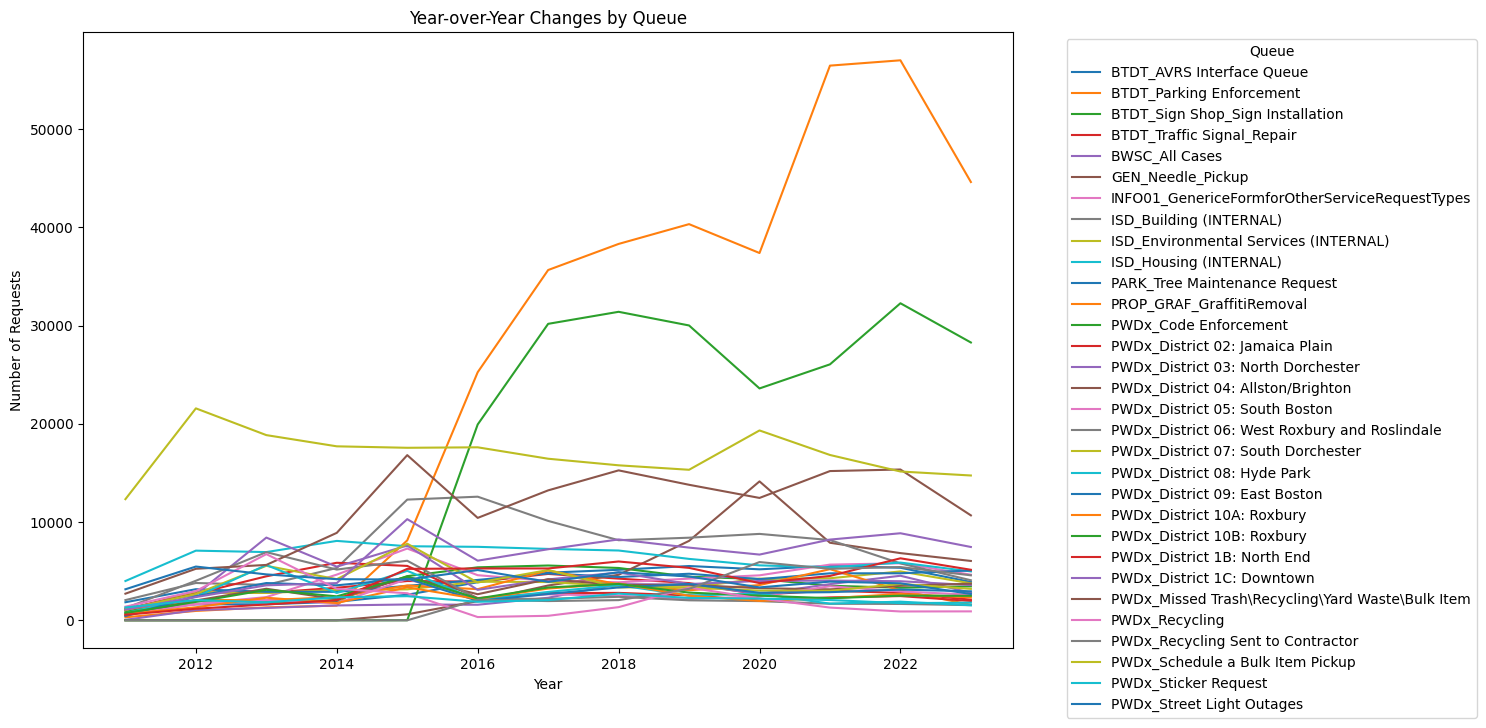

queue
BTDT_Parking Enforcement    44606.0
PWDx_Code Enforcement       28275.0
Name: 2023, dtype: float64


In [22]:
yearly_subject = df.groupby(['year', 'subject'])['case_enquiry_id'].count().unstack().fillna(0)
plt.figure(figsize=(12, 8))
yearly_subject.plot(kind='line', ax=plt.gca())
plt.title('Year-over-Year Changes by Subject')
plt.xlabel('Year')
plt.ylabel('Number of Requests')
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

reasons = df['reason'].value_counts()
reasons = reasons[reasons > 10000].index

yearly_reason = df[df['reason'].isin(reasons)].groupby(['year', 'reason'])['case_enquiry_id'].count().unstack().fillna(0)
plt.figure(figsize=(12, 8))
yearly_reason.plot(kind='line', ax=plt.gca())
plt.title('Year-over-Year Changes by Reason')
plt.xlabel('Year')
plt.ylabel('Number of Requests')
plt.legend(title='Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print(yearly_reason.loc[2023].nlargest(2))


queues = df['queue'].value_counts()
queues = queues[queues > 25000].index

yearly_queue = df[df['queue'].isin(queues)].groupby(['year', 'queue'])['case_enquiry_id'].count().unstack().fillna(0)
plt.figure(figsize=(12, 8))
yearly_queue.plot(kind='line', ax=plt.gca())
plt.title('Year-over-Year Changes by Queue')
plt.xlabel('Year')
plt.ylabel('Number of Requests')
plt.legend(title='Queue', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Print the top 2 highest request for 2023 by queue
print(yearly_queue.loc[2023].nlargest(2))

